# State estimation examples

This notebook relies on the Python code stored in the folder python.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [32]:
#Import base libraries
import numpy as np
import matplotlib.pyplot as plt
import random
from matplotlib import animation, rc
from IPython.display import HTML

# Initialize random number generator
random.seed(0)
%matplotlib inline
plt.style.use(['seaborn-darkgrid', 'seaborn-poster'])

In [3]:
# Import libraries for the examples
import os
import sys
module_path = os.path.abspath(os.path.join('../python'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [4]:
rc('animation', html='html5')

In [5]:
import simplified_models
from utils import Coordinate2d

# Exponential decay scalar case

This section shows the exponential decay at different rate. If the value of the base is negative, over time the function tends to 0, but it oscillates between positive and negative values.

In [ ]:
time_vector = np.arange(0, 25, 1)
l_value = (0.9, 0.7, 0.1, -0.7)

In [ ]:
plt.figure(figsize=(18, 6))
for i_l in l_value:
    plt.plot(time_vector, i_l**time_vector, label="$a_d-lc$={}".format(i_l))
plt.legend(prop={'size':18})
#plt.title("Examples of L^t")
#plt.xlabel("Time step", fontsize=18)

In [ ]:
plt.style.available

In [ ]:
plt.style.use(['seaborn-darkgrid', 'seaborn-poster'])

# Automotive example

In [33]:
n_samples = 30
sample_time = 0.1

In [34]:
# True model
initial_position = Coordinate2d(2, 3)
initial_speed = Coordinate2d(2, 2)
true_model = simplified_models.TrueModel(initial_position, initial_speed, sample_time)

In [35]:
# Estimator
initial_position_estimation = Coordinate2d(0, 0)
initial_speed_estimation = Coordinate2d(0, 0)
observer_gain = [
    [0.5, 0],
    [0.5, 0],
    [0, 0.3],
    [0, 0.3]
]
sample_time = 0.1
observer = simplified_models.Observer(initial_position_estimation, initial_speed_estimation, sample_time, observer_gain)

In [36]:
# generate input for the system
acceleration = [Coordinate2d(random.uniform(0, 5), random.uniform(-5, 0)) for i in range(n_samples)]

In [37]:
position = [initial_position]
estimated_position = [initial_position_estimation]
speed = [initial_speed]
estimated_speed = [initial_speed_estimation]
for i_step in range(n_samples):
    true_model.update_state(acceleration[i_step])
    position.append(true_model.get_position())
    observer.get_estimation(acceleration[i_step], position[i_step])
    estimated_position.append(observer.get_position())
    speed.append(true_model.get_speed())
    estimated_speed.append(observer.get_speed())

In [38]:
x_val = [position[i].get_x() for i in range(len(position))]
y_val = [position[i].get_y() for i in range(len(position))]

x_estimated_val = [estimated_position[i].get_x() for i in range(len(estimated_position))]
y_estimated_val = [estimated_position[i].get_y() for i in range(len(estimated_position))]

x_speed = [speed[i].get_x() for i in range(len(speed))]
y_speed = [speed[i].get_y() for i in range(len(speed))]

x_estimated_speed = [estimated_speed[i].get_x() for i in range(len(estimated_speed))]
y_estimated_speed = [estimated_speed[i].get_y() for i in range(len(estimated_speed))]

x_numeric_speed = [0] + [(x_val[i+1] - x_val[i])/sample_time for i in range(len(speed) - 1)]
y_numeric_speed = [0] + [(y_val[i+1] - y_val[i])/sample_time for i in range(len(speed) - 1)]

//anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


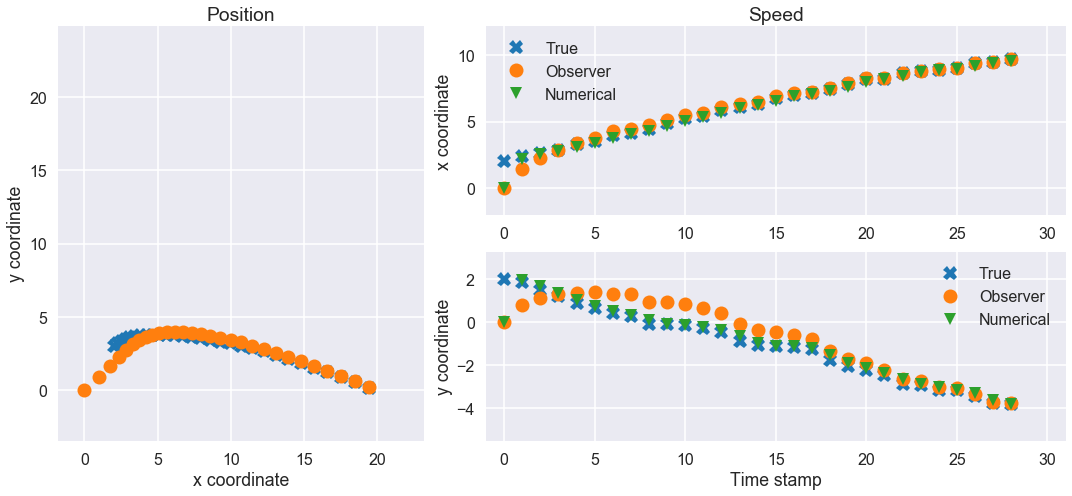

In [39]:
fig=plt.figure(figsize=(15, 7))
ax1 = plt.subplot2grid((2,5), (0,0), rowspan=2, colspan=2)
ax1.axis('equal')
ax2 = plt.subplot2grid((2,5), (0,2), colspan=3, autoscale_on=True)
ax3 = plt.subplot2grid((2,5), (1,2), colspan=3, autoscale_on=True)

ax1.legend()
ax1.set_xlabel('x coordinate')
ax1.set_ylabel('y coordinate')
ax1.set_title('Position')

x_pos_max = max([max(x_val), max(x_estimated_val)])
x_pos_min = min([min(x_val), min(x_estimated_val)])
delta_x = x_pos_max - x_pos_min
y_pos_max = max(y_val)
y_pos_min = min(y_val)
delta_y = y_pos_max - y_pos_min

x_speed_max = max((max(x_speed), max(x_estimated_speed), max(x_numeric_speed)))
x_speed_min = min((min(x_speed), min(x_estimated_speed), min(x_numeric_speed)))
delta_x_speed = x_speed_max - x_speed_min
y_speed_max = max((max(y_speed), max(y_estimated_speed), max(y_numeric_speed)))
y_speed_min = min((min(y_speed), min(y_estimated_speed), min(y_numeric_speed)))
delta_y_speed = y_speed_max - y_speed_min


ax1.set_xlim([x_pos_min - delta_x/5, x_pos_max + delta_x/5])
ax1.set_ylim([x_pos_min - delta_x/5, x_pos_max + delta_x/5])
ax2.set_xlim([-1, n_samples + 1])
ax2.set_ylim([x_speed_min - delta_x_speed/5, x_speed_max + delta_x_speed/5])
ax3.set_ylim([y_speed_min - delta_y_speed/5, y_speed_max + delta_y_speed/5])
ax3.set_xlim([-1, n_samples + 1])

line1, = ax1.plot([], [], linestyle='None', marker='X',  markersize=14, label='True')
line2, = ax1.plot([], [], linestyle='None', marker='o',  markersize=14, label='Observer')

line4, = ax2.plot([], [], linestyle='None', marker='X',  markersize=14, label='True')
line5, = ax2.plot([], [], linestyle='None', marker='o',  markersize=14, label='Observer')
line6, = ax2.plot([], [], linestyle='None', marker='v',  markersize=12, label='Numerical')
ax2.legend()
ax2.set_title('Speed')
ax2.set_ylabel('x coordinate')

line7, = ax3.plot([], [], linestyle='None', marker='X',  markersize=14, label='True')
line8, = ax3.plot([], [], linestyle='None', marker='o',  markersize=14, label='Observer')
line9, = ax3.plot([], [], linestyle='None', marker='v',  markersize=12, label='Numerical')

ax3.legend()
ax3.set_xlabel('Time stamp')
ax3.set_ylabel('y coordinate')

fig.tight_layout()
def init():
    """initialize animation"""
    line1.set_data([], [])
    line2.set_data([], [])
    line4.set_data([], [])
    line5.set_data([], [])
    line6.set_data([], [])
    line7.set_data([], [])
    line8.set_data([], [])
    line9.set_data([], [])
    return line1, line2, line4, line5, line6, line7, line8, line9

def animate(i):
    """perform animation step"""
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line1.set_data(x_val[:i], y_val[:i])
    line2.set_data(x_estimated_val[:i], y_estimated_val[:i])
    
    line4.set_data(range(i), x_speed[:i])
    line5.set_data(range(i), x_estimated_speed[:i])
    line6.set_data(range(i), x_numeric_speed[:i])
    
    line7.set_data(range(i), y_speed[:i])
    line8.set_data(range(i), y_estimated_speed[:i])
    line9.set_data(range(i), y_numeric_speed[:i])
    
    return line1, line2, line4, line5, line6, line7, line8, line9
    
    
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=n_samples, interval=200, blit=True)

# call our new function to display the animation
#display_animation(anim)
anim.save('observer_ex_1.avi', fps=5, extra_args=['-vcodec', 'libx264', '-pix_fmt', 'yuv420p'])
HTML(anim.to_html5_video())

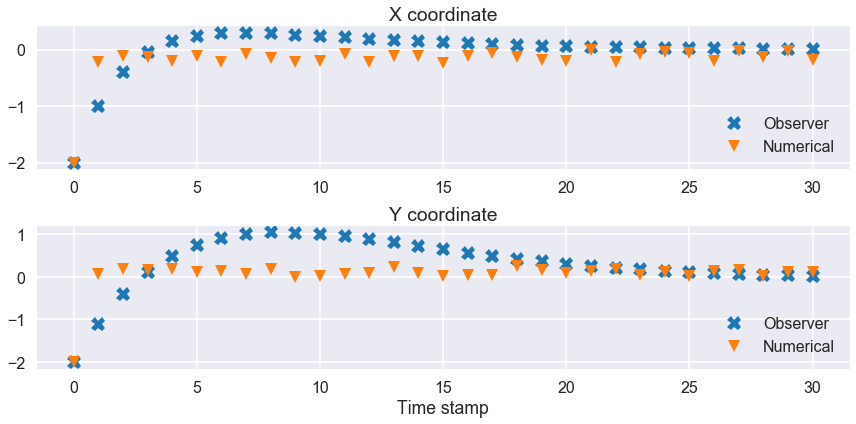

In [44]:
fig=plt.figure(figsize=(12, 6))
ax1 = plt.subplot(211)
ax2 = plt.subplot(212)

ax1.plot(range(len(x_speed)), np.asarray(x_estimated_speed) - np.asarray(x_speed), linestyle='None', marker='X',  markersize=14, label='Observer')
ax1.plot(range(len(x_numeric_speed)), np.asarray(x_numeric_speed) - np.asarray(x_speed), linestyle='None', marker='v',  markersize=12, label='Numerical')
ax1.legend()
ax1.set_title('X coordinate')

ax2.plot(range(len(y_estimated_speed)), np.asarray(y_estimated_speed) - np.asarray(y_speed), linestyle='None', marker='X',  markersize=14, label='Observer')
ax2.plot(range(len(y_numeric_speed)), np.asarray(y_numeric_speed) - np.asarray(y_speed), linestyle='None', marker='v',  markersize=12, label='Numerical')
ax2.legend()
ax2.set_title('Y coordinate')
ax2.set_xlabel('Time stamp')

fig.tight_layout()

## Measurement noise

In the following, we repeat the experiment above, but we add now a little bit of measurement noise.

In [49]:
# generate input for the system
measurement_error = [Coordinate2d(random.uniform(-delta_x/10, delta_x/10), random.uniform(-delta_y/20, delta_y/20)) for i in range(n_samples)]

In [50]:
position = [initial_position]
measured_position = [initial_position + measurement_error[0]]
estimated_position = [initial_position_estimation]
speed = [initial_speed]
estimated_speed = [initial_speed_estimation]
for i_step in range(n_samples):
    true_model.update_state(acceleration[i_step])
    position.append(true_model.get_position())
    measured_position.append(true_model.get_position() + measurement_error[i_step])
    observer.get_estimation(acceleration[i_step], measured_position[i_step])
    estimated_position.append(observer.get_position())
    speed.append(true_model.get_speed())
    estimated_speed.append(observer.get_speed())

In [51]:
x_val = [position[i].get_x() for i in range(len(position))]
y_val = [position[i].get_y() for i in range(len(position))]

x_val_measured = [measured_position[i].get_x() for i in range(len(position))]
y_val_measured = [measured_position[i].get_y() for i in range(len(position))]

x_estimated_val = [estimated_position[i].get_x() for i in range(len(estimated_position))]
y_estimated_val = [estimated_position[i].get_y() for i in range(len(estimated_position))]

x_speed = [speed[i].get_x() for i in range(len(speed))]
y_speed = [speed[i].get_y() for i in range(len(speed))]

x_estimated_speed = [estimated_speed[i].get_x() for i in range(len(estimated_speed))]
y_estimated_speed = [estimated_speed[i].get_y() for i in range(len(estimated_speed))]

x_numeric_speed = [0] + [(x_val_measured[i+1] - x_val_measured[i])/sample_time for i in range(len(speed) - 1)]
y_numeric_speed = [0] + [(y_val_measured[i+1] - y_val_measured[i])/sample_time for i in range(len(speed) - 1)]

//anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


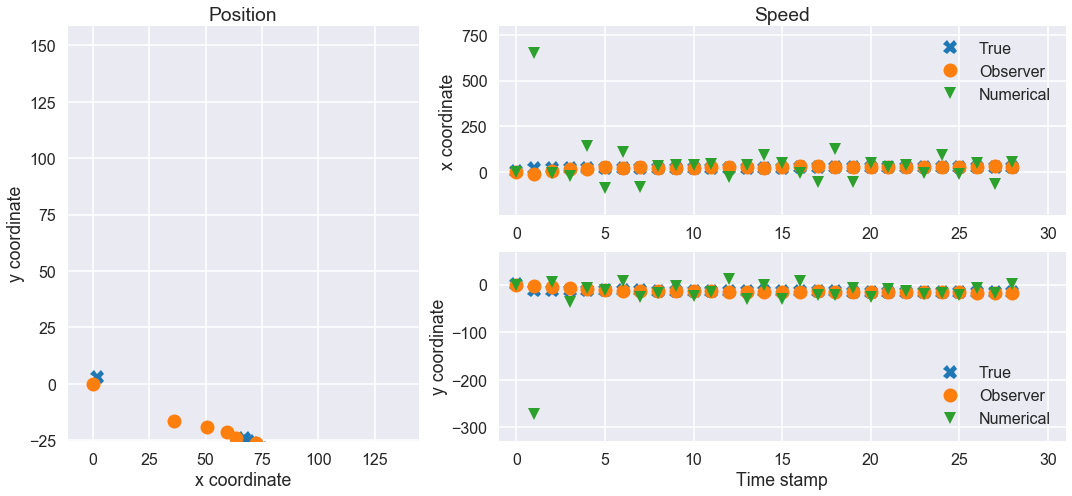

In [52]:
fig=plt.figure(figsize=(15, 7))
ax1 = plt.subplot2grid((2,5), (0,0), rowspan=2, colspan=2)
ax1.axis('equal')
ax2 = plt.subplot2grid((2,5), (0,2), colspan=3, autoscale_on=True)
ax3 = plt.subplot2grid((2,5), (1,2), colspan=3, autoscale_on=True)

ax1.legend()
ax1.set_xlabel('x coordinate')
ax1.set_ylabel('y coordinate')
ax1.set_title('Position')

x_pos_max = max([max(x_val), max(x_estimated_val)])
x_pos_min = min([min(x_val), min(x_estimated_val)])
delta_x = x_pos_max - x_pos_min
y_pos_max = max(y_val)
y_pos_min = min(y_val)
delta_y = y_pos_max - y_pos_min

x_speed_max = max((max(x_speed), max(x_estimated_speed), max(x_numeric_speed)))
x_speed_min = min((min(x_speed), min(x_estimated_speed), min(x_numeric_speed)))
delta_x_speed = x_speed_max - x_speed_min
y_speed_max = max((max(y_speed), max(y_estimated_speed), max(y_numeric_speed)))
y_speed_min = min((min(y_speed), min(y_estimated_speed), min(y_numeric_speed)))
delta_y_speed = y_speed_max - y_speed_min


ax1.set_xlim([x_pos_min - delta_x/5, x_pos_max + delta_x/5])
ax1.set_ylim([x_pos_min - delta_x/5, x_pos_max + delta_x/5])
ax2.set_xlim([-1, n_samples + 1])
ax2.set_ylim([x_speed_min - delta_x_speed/5, x_speed_max + delta_x_speed/5])
ax3.set_ylim([y_speed_min - delta_y_speed/5, y_speed_max + delta_y_speed/5])
ax3.set_xlim([-1, n_samples + 1])

line1, = ax1.plot([], [], linestyle='None', marker='X',  markersize=14, label='True')
line2, = ax1.plot([], [], linestyle='None', marker='o',  markersize=14, label='Observer')

line4, = ax2.plot([], [], linestyle='None', marker='X',  markersize=14, label='True')
line5, = ax2.plot([], [], linestyle='None', marker='o',  markersize=14, label='Observer')
line6, = ax2.plot([], [], linestyle='None', marker='v',  markersize=12, label='Numerical')
ax2.legend()
ax2.set_title('Speed')
ax2.set_ylabel('x coordinate')

line7, = ax3.plot([], [], linestyle='None', marker='X',  markersize=14, label='True')
line8, = ax3.plot([], [], linestyle='None', marker='o',  markersize=14, label='Observer')
line9, = ax3.plot([], [], linestyle='None', marker='v',  markersize=12, label='Numerical')

ax3.legend()
ax3.set_xlabel('Time stamp')
ax3.set_ylabel('y coordinate')

fig.tight_layout()
def init():
    """initialize animation"""
    line1.set_data([], [])
    line2.set_data([], [])
    line4.set_data([], [])
    line5.set_data([], [])
    line6.set_data([], [])
    line7.set_data([], [])
    line8.set_data([], [])
    line9.set_data([], [])
    return line1, line2, line4, line5, line6, line7, line8, line9

def animate(i):
    """perform animation step"""
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line1.set_data(x_val[:i], y_val[:i])
    line2.set_data(x_estimated_val[:i], y_estimated_val[:i])
    
    line4.set_data(range(i), x_speed[:i])
    line5.set_data(range(i), x_estimated_speed[:i])
    line6.set_data(range(i), x_numeric_speed[:i])
    
    line7.set_data(range(i), y_speed[:i])
    line8.set_data(range(i), y_estimated_speed[:i])
    line9.set_data(range(i), y_numeric_speed[:i])
    
    return line1, line2, line4, line5, line6, line7, line8, line9
    
    
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=n_samples, interval=200, blit=True)

# call our new function to display the animation
#display_animation(anim)
anim.save('observer_ex_1.avi', fps=5, extra_args=['-vcodec', 'libx264', '-pix_fmt', 'yuv420p'])
HTML(anim.to_html5_video())

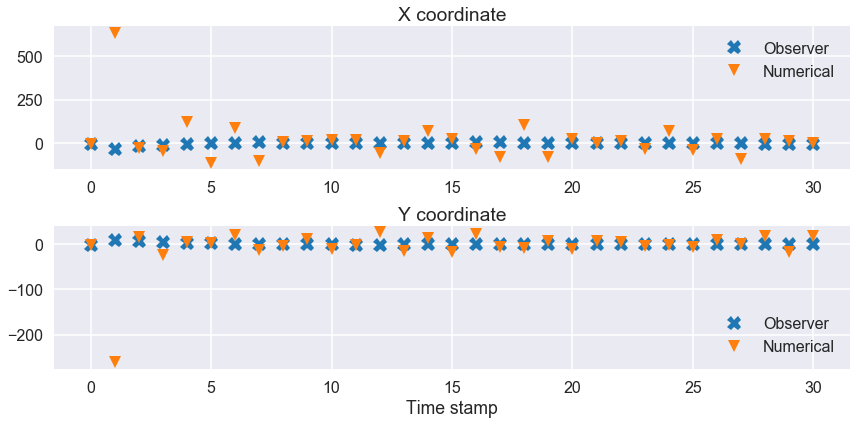

In [53]:
fig=plt.figure(figsize=(12, 6))
ax1 = plt.subplot(211)
ax2 = plt.subplot(212)

ax1.plot(range(len(x_speed)), np.asarray(x_estimated_speed) - np.asarray(x_speed), linestyle='None', marker='X',  markersize=14, label='Observer')
ax1.plot(range(len(x_numeric_speed)), np.asarray(x_numeric_speed) - np.asarray(x_speed), linestyle='None', marker='v',  markersize=12, label='Numerical')
ax1.legend()
ax1.set_title('X coordinate')

ax2.plot(range(len(y_estimated_speed)), np.asarray(y_estimated_speed) - np.asarray(y_speed), linestyle='None', marker='X',  markersize=14, label='Observer')
ax2.plot(range(len(y_numeric_speed)), np.asarray(y_numeric_speed) - np.asarray(y_speed), linestyle='None', marker='v',  markersize=12, label='Numerical')
ax2.legend()
ax2.set_title('Y coordinate')
ax2.set_xlabel('Time stamp')

fig.tight_layout()

In [59]:
position

[(X:     2.00, Y:     3.00),
 (X:    66.97, Y:   -24.13),
 (X:    68.85, Y:   -25.21),
 (X:    70.75, Y:   -26.32),
 (X:    72.68, Y:   -27.47),
 (X:    74.65, Y:   -28.65),
 (X:    76.65, Y:   -29.84),
 (X:    78.68, Y:   -31.06),
 (X:    80.73, Y:   -32.30),
 (X:    82.82, Y:   -33.56),
 (X:    84.95, Y:   -34.82),
 (X:    87.11, Y:   -36.10),
 (X:    89.31, Y:   -37.38),
 (X:    91.53, Y:   -38.70),
 (X:    93.78, Y:   -40.05),
 (X:    96.06, Y:   -41.41),
 (X:    98.38, Y:   -42.78),
 (X:   100.71, Y:   -44.15),
 (X:   103.07, Y:   -45.55),
 (X:   105.46, Y:   -46.99),
 (X:   107.88, Y:   -48.46),
 (X:   110.33, Y:   -49.95),
 (X:   112.80, Y:   -51.46),
 (X:   115.30, Y:   -53.00),
 (X:   117.81, Y:   -54.56),
 (X:   120.33, Y:   -56.12),
 (X:   122.88, Y:   -57.70),
 (X:   125.45, Y:   -59.31),
 (X:   128.03, Y:   -60.94),
 (X:   130.63, Y:   -62.59),
 (X:   133.25, Y:   -64.25)]